In [5]:
%autosave 3600

Autosaving every 3600 seconds


In [1]:

from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Lecture 24 ##

In [2]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [3]:
babies = births.select('Birth Weight', 'Gestational Days')
babies

Birth Weight,Gestational Days
120,284
113,282
128,279
108,282
136,286
138,244
132,245
120,289
143,299
140,351


In [4]:
babies = babies.with_column(
    'Weight per Day',
    babies.column('Birth Weight') / babies.column('Gestational Days'))
babies

Birth Weight,Gestational Days,Weight per Day
120,284,0.422535
113,282,0.400709
128,279,0.458781
108,282,0.382979
136,286,0.475524
138,244,0.565574
132,245,0.538776
120,289,0.415225
143,299,0.478261
140,351,0.39886


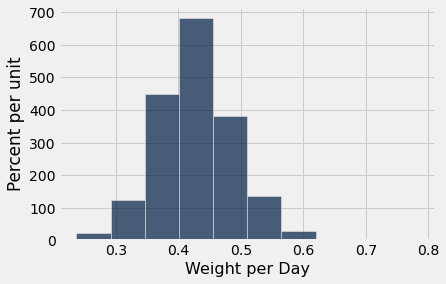

In [5]:
babies.hist('Weight per Day')

In [6]:
percentile(50, babies.column('Weight per Day'))

0.42907801418439717

In [7]:
# Bootstrap for median

medians = make_array()

for i in np.arange(1000):
    resampled = babies.sample()
    median = percentile(50, resampled.column('Weight per Day'))
    medians = np.append(medians, median)

In [8]:
interval_95 = make_array(percentile(2.5, medians), percentile(97.5, medians))
interval_95

array([0.42545455, 0.43262411])

95% Confidence Interval for Median Weight/Days ratio
[0.42545455 0.43262411]


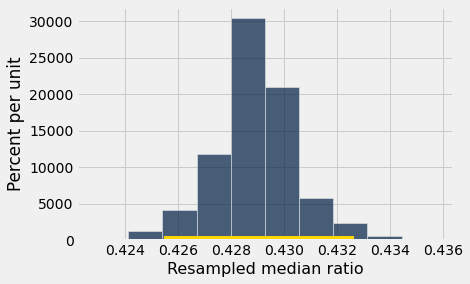

In [9]:
Table().with_column('Resampled median ratio', medians).hist()
plots.plot(interval_95, [0, 0], color='gold', lw=8)
print('95% Confidence Interval for Median Weight/Days ratio')
print(interval_95)

In [10]:
interval_80 = make_array(percentile(10, medians), percentile(90, medians))
interval_80

array([0.42708333, 0.43060498])

80% Confidence interval for median weight/days ratio in population:
[0.427 0.431]


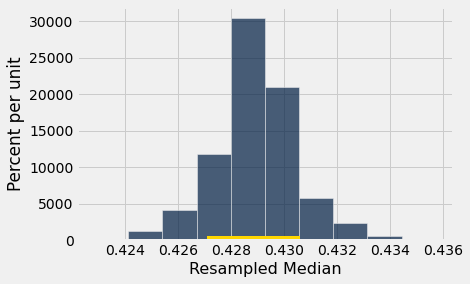

In [11]:
Table().with_column('Resampled Median', medians).hist()
plots.plot(interval_80, [0, 0], color='gold', lw=8)
print('80% Confidence interval for median weight/days ratio in population:')
print(np.round(interval_80, 3))

In [12]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


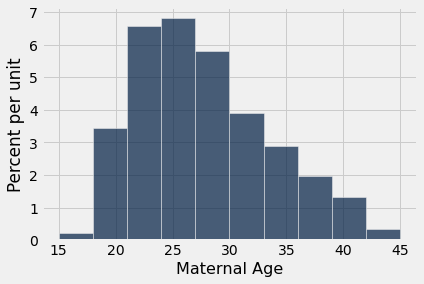

In [13]:
births.hist('Maternal Age')

In [14]:
np.mean(births.column('Maternal Age'))

27.228279386712096

In [15]:
# Bootstrap for mean

means = make_array()

for i in np.arange(1000):
    resampled = births.sample()
    mean = np.mean(resampled.column('Maternal Age'))
    means = np.append(means, mean)

In [16]:
interval_95 = make_array(percentile(2.5, means), percentile(97.5, means))
interval_95

array([26.88415673, 27.57325383])

95% Confidence Interval for Mean Age
[26.88415673 27.57325383]


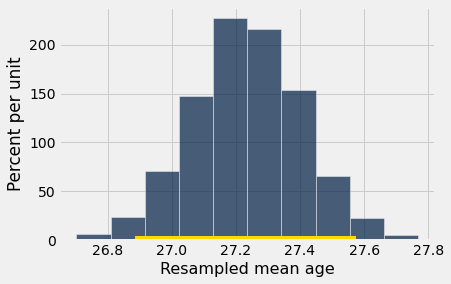

In [17]:
Table().with_column('Resampled mean age', means).hist()
plots.plot(interval_95, [0, 0], color='gold', lw=8)
print('95% Confidence Interval for Mean Age')
print(interval_95)